In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/outputs/sample_c/model_fine_tuning.csv')
for params, df in results.groupby(['param_max_depth', 'param_min_samples_leaf']):
    print(params)
    display(df[['mean_test_score', 'std_test_score']].mean())

(5, 1)


mean_test_score    0.330652
std_test_score     0.014143
dtype: float64

(5, 5)


mean_test_score    0.330638
std_test_score     0.014183
dtype: float64

(5, 10)


mean_test_score    0.330327
std_test_score     0.014254
dtype: float64

(50, 1)


mean_test_score    0.462703
std_test_score     0.024510
dtype: float64

(50, 5)


mean_test_score    0.480750
std_test_score     0.023732
dtype: float64

(50, 10)


mean_test_score    0.474411
std_test_score     0.023018
dtype: float64

(100, 1)


mean_test_score    0.462703
std_test_score     0.024510
dtype: float64

(100, 5)


mean_test_score    0.480750
std_test_score     0.023732
dtype: float64

(100, 10)


mean_test_score    0.474411
std_test_score     0.023018
dtype: float64

---

In [3]:
# #### THE FINAL CHOICE IS: max_depth': 50, 'min_samples_leaf': 5

rss = [516, 1919, 700]

X_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/final_X_train_val.csv')
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/y_train_val.csv')

regression_forest = dict()

for rs in rss:
    regression_forest[rs] = RandomForestRegressor(max_depth=50,
                                          min_samples_leaf=5,
                                          n_jobs=-1, 
                                          random_state=rs
                                          )

    regression_forest[rs].fit(X_train, y_train.iloc[:, 0])

In [4]:
with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/trained_models/final_model.pkl', 'wb') as f:
    pickle.dump(regression_forest, f)

with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/trained_models/final_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [5]:
# transform = {0.0:0,0.1:1,0.2:2,0.3:3,0.4:4,0.5:5,0.6:6,0.7:7,0.8:8,0.9:9,1.0:10}

scores = dict()

for rs in rss:
    y_train_pred = model[rs].predict(X_train).round(0)
    scores[rs] = (r2_score(y_train_pred, y_train), 
                  accuracy_score(pd.Series(y_train_pred), pd.Series(y_train.iloc[:, 0])))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))


X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/final_X_test.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/y_test.csv')

scores = dict()

for rs in rss:
    y_test_pred = model[rs].predict(X_test).round(0)
    scores[rs] = (r2_score(y_test_pred, y_test), 
                  accuracy_score(pd.Series(y_test_pred), pd.Series(y_test.iloc[:, 0])))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))

0.4640996940958515 0.26038555525386914
0.009109739090308433 0.19999999999999998


In [6]:
def predict_dispersion(crosstab):
    total = 0
    for i, row in enumerate(crosstab.to_numpy()):
        for j, val in enumerate(row):
            total += val * abs(j - i)
    return total/(crosstab.sum().sum())*(crosstab.shape[1])

In [7]:
train_mat= pd.crosstab(y_train.iloc[:, 0], y_train_pred)
test_mat = pd.crosstab(y_test.iloc[:,0], y_test_pred)

In [8]:
print(train_mat.shape)
print(test_mat.shape)

print(predict_dispersion(train_mat))
print(predict_dispersion(test_mat))

(11, 11)
(11, 11)
13.646212326907413
18.23179487179487


---

In [9]:
results = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/outputs/sample_c/model_classification_fine_tuning.csv')
for params, df in results.groupby(['param_max_depth', 'param_min_samples_leaf']):
    print(params)
    display(df[['mean_test_score', 'std_test_score']].mean())

(5, 1)


mean_test_score    0.216579
std_test_score     0.012659
dtype: float64

(5, 5)


mean_test_score    0.213865
std_test_score     0.009788
dtype: float64

(5, 10)


mean_test_score    0.217485
std_test_score     0.011978
dtype: float64

(50, 1)


mean_test_score    0.298217
std_test_score     0.007907
dtype: float64

(50, 5)


mean_test_score    0.295592
std_test_score     0.010844
dtype: float64

(50, 10)


mean_test_score    0.283463
std_test_score     0.010940
dtype: float64

(100, 1)


mean_test_score    0.298217
std_test_score     0.011325
dtype: float64

(100, 5)


mean_test_score    0.293691
std_test_score     0.011502
dtype: float64

(100, 10)


mean_test_score    0.283011
std_test_score     0.009714
dtype: float64

In [10]:
#### THE FINAL CHOICE IS: max_depth': 50, 'min_samples_leaf': 1

rss = [516, 1919, 700]

X_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/final_X_train_val.csv')
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/y_train_val.csv')

classification_forest = dict()

for rs in rss:
    classification_forest[rs] = RandomForestClassifier(max_depth=50,
                                          min_samples_leaf=1,
                                          n_jobs=-1, 
                                          random_state=rs
                                          )

    classification_forest[rs].fit(X_train, y_train.iloc[:, 0])

with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/trained_models/final_classification_model.pkl', 'wb') as f:
    pickle.dump(classification_forest, f)

In [11]:
with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/trained_models/final_classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

# transform = {0.0:0,0.1:1,0.2:2,0.3:3,0.4:4,0.5:5,0.6:6,0.7:7,0.8:8,0.9:9,1.0:10}

scores = dict()

for rs in rss:
    y_train_pred = model[rs].predict(X_train).round(1)
    scores[rs] = (r2_score(y_train_pred, y_train.iloc[:, 0]), 
                  accuracy_score(pd.Series(y_train_pred), pd.Series(y_train.iloc[:, 0])))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))


X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/final_X_test.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/y_test.csv')

scores = dict()

for rs in rss:
    y_test_pred = model[rs].predict(X_test).round(1)
    scores[rs] = (r2_score(y_test_pred, y_test.iloc[:, 0]), 
                  accuracy_score(pd.Series(y_test_pred), pd.Series(y_test.iloc[:, 0])))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))

0.7944511431191712 0.8203457326454883
0.20273715281384552 0.2805128205128205


In [12]:
train_mat= pd.crosstab(y_train.iloc[:,0], y_train_pred)
test_mat = pd.crosstab(y_test.iloc[:,0], y_test_pred)

In [13]:
print(train_mat.shape)
print(test_mat.shape)

print(predict_dispersion(train_mat))
print(predict_dispersion(test_mat))

(11, 11)
(11, 11)
5.2705222192053585
21.198974358974358


---

In [14]:
with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/trained_models/final_classification_model.pkl', 'rb') as f:
    classification_forest = pickle.load(f)

with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/trained_models/final_model.pkl', 'rb') as f:
    regression_forest = pickle.load(f)

In [15]:
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/y_train_val.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_c/y_test.csv')

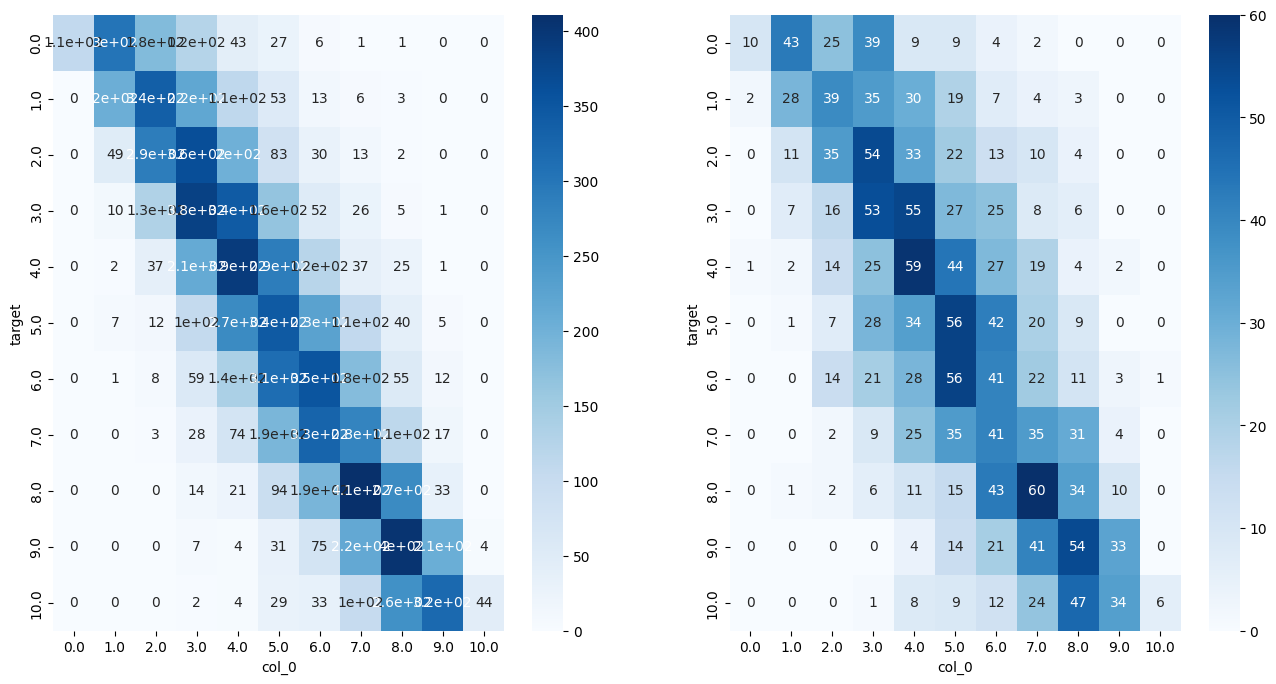

In [16]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))

sns.heatmap(pd.crosstab(
                        y_train.iloc[:, 0], 
                        regression_forest[516].predict(X_train).round(0)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[0]
                        )

sns.heatmap(pd.crosstab(
                        y_test.iloc[:, 0], 
                        regression_forest[516].predict(X_test).round(0)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[1]
                        )

plt.show()

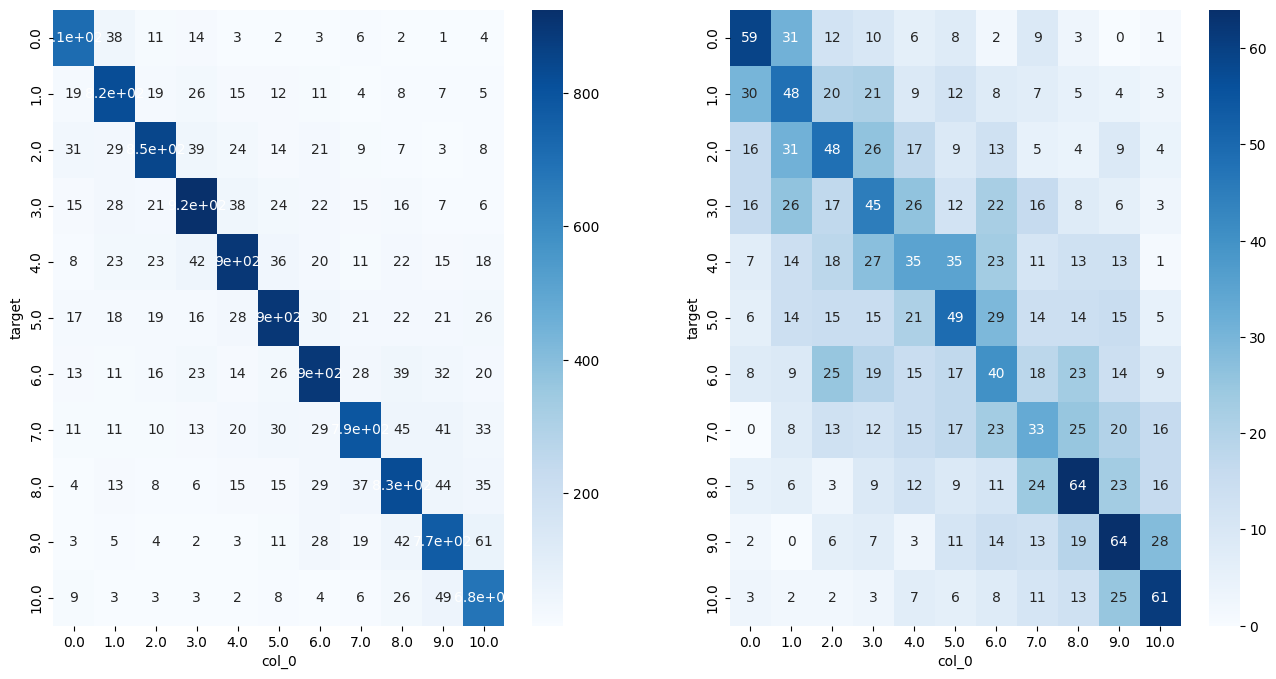

In [17]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))

sns.heatmap(pd.crosstab(
                        y_train.iloc[:, 0], 
                        classification_forest[516].predict(X_train)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[0]
                        )

sns.heatmap(pd.crosstab(
                        y_test.iloc[:, 0], 
                        classification_forest[516].predict(X_test)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[1]
                        )

plt.show()